# Import Required Libraries
Import the necessary libraries, including pandas, numpy, sklearn, and joblib.

In [19]:
# Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
import joblib

# Load Dataset
Load the Pima Indians Diabetes Dataset using pandas.

In [20]:
# Load Dataset
df = pd.read_csv(r"Pima Indians Diabetes Dataset.csv")  # Load the dataset into a DataFrame
df.head()  # Display the first few rows of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Preprocess Data
Handle missing values, normalize features, and encode categorical variables if necessary.

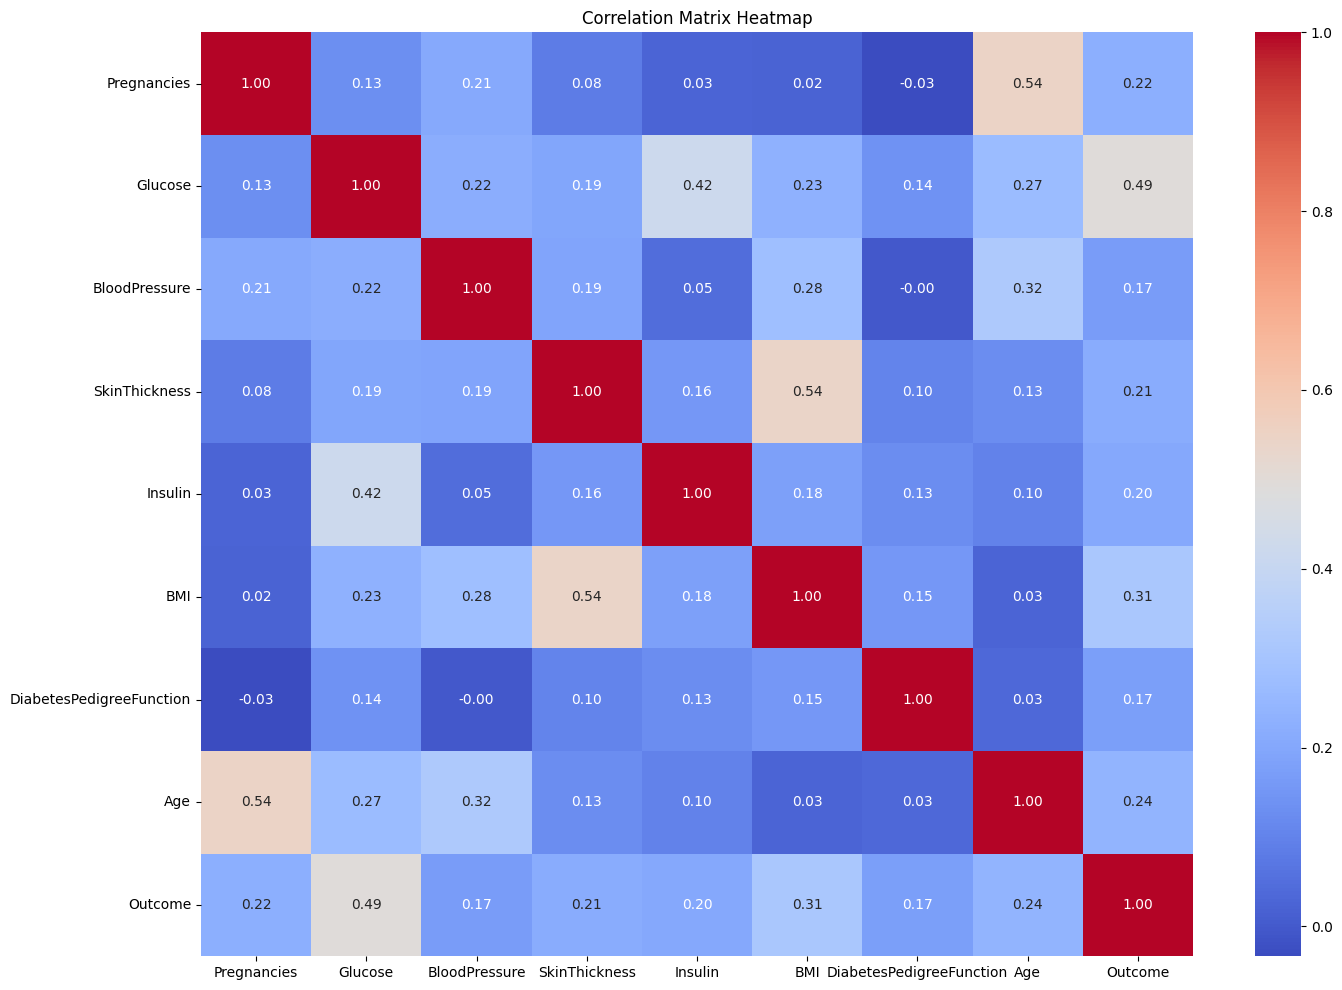

Correlation with target variable:
Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64
Relevant features:
['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BloodPressure']


In [21]:
# Preprocess Data

# Handle missing values by replacing zeros with NaN (except for 'Pregnancies' and 'Outcome')
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Fill missing values with the median of each column
df.fillna(df.median(), inplace=True)

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Get the correlation of each feature with the target variable
target_column = 'Outcome'
correlation_with_target = correlation_matrix[target_column].abs().sort_values(ascending=False)

# Display the correlation with the target variable
print("Correlation with target variable:")
print(correlation_with_target)

# Drop columns with low correlation to the target variable
threshold = 0.1
relevant_features = correlation_with_target[correlation_with_target > threshold].index.tolist()

# Keep only the relevant features
df_relevant = df[relevant_features]

# Split the data into features and target
X_relevant = df_relevant.drop(target_column, axis=1)
y_relevant = df_relevant[target_column]

# Display the relevant features
print("Relevant features:")
print(X_relevant.columns.tolist())

# Split Dataset
Split the dataset into training and testing sets using train_test_split from sklearn.

In [22]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_relevant, y_relevant, test_size=0.2, random_state=42)

# Train and Evaluate SVC Model
Train and Evaluate Support Vector Classifier (SVC) model using the training data.

In [23]:
# Train SVC Model

# Initialize the Support Vector Classifier (SVC) model
svc_model = SVC()

# Train the SVC model using the training data
svc_model.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred_svc = svc_model.predict(X_test)

# Calculate the accuracy of the SVC model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Model Accuracy: {accuracy_svc:.2f}")

# Calculate Precision, Recall, and F1 Score
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

print(f"SVC Model Precision: {precision_svc:.2f}")
print(f"SVC Model Recall: {recall_svc:.2f}")
print(f"SVC Model F1 Score: {f1_svc:.2f}")

SVC Model Accuracy: 0.76
SVC Model Precision: 0.70
SVC Model Recall: 0.58
SVC Model F1 Score: 0.63


# Train and Evaluate Logistic Regression Model
Train and Evaluate Logistic Regression model using the training data.

In [24]:
# Train Logistic Regression Model

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Train the Logistic Regression model using the training data
logistic_model.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate the accuracy of the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Model Accuracy: {accuracy_logistic:.2f}")

# Calculate Precision, Recall, and F1 Score
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

print(f"Logistic Regression Model Precision: {precision_logistic:.2f}")
print(f"Logistic Regression Model Recall: {recall_logistic:.2f}")
print(f"Logistic Regression Model F1 Score: {f1_logistic:.2f}")

Logistic Regression Model Accuracy: 0.78
Logistic Regression Model Precision: 0.73
Logistic Regression Model Recall: 0.60
Logistic Regression Model F1 Score: 0.66


# Stack Models
Combine the predictions of the SVC and Logistic Regression models using a stacking method.

In [25]:
# Stack Models

# Define the base models
estimators = [
    ('svc', SVC(probability=True)),
    ('logistic', LogisticRegression(max_iter=1000))
]

# Initialize the Stacking Classifier with the base models and a final estimator
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the Stacking Classifier using the training data
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('svc', SVC(probability=True)),
                               ('logistic', LogisticRegression(max_iter=1000))],
                   final_estimator=LogisticRegression())

# Evaluate Model Accuracy
Calculate and print the accuracy of the stacked model on the testing data.

In [26]:
# Evaluate Model Accuracy

# Predict the outcomes on the test set
y_pred_stacking = stacking_model.predict(X_test)

# Calculate the accuracy of the Stacking Classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Model Accuracy: {accuracy_stacking:.2f}")

# Calculate Precision, Recall, and F1 Score
precision_stacking = precision_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)

print(f"Stacking Model Precision: {precision_stacking:.2f}")
print(f"Stacking Model Recall: {recall_stacking:.2f}")
print(f"Stacking Model F1 Score: {f1_stacking:.2f}")

Stacking Model Accuracy: 0.78
Stacking Model Precision: 0.71
Stacking Model Recall: 0.64
Stacking Model F1 Score: 0.67


# Save the Model
Save the trained model to a folder using joblib.

In [27]:
# Save the Model

# Save the trained Stacking Classifier model to a file
joblib.dump(stacking_model, 'models/Pima Indians Diabetes Prediction.pkl')

# Define the columns used for training
feature_columns = X_relevant.columns.tolist()

# Print the columns used for training
print("Columns used for training the model:")
print(feature_columns)

# Display the number of parameters needed for the prediction
print(f'Number of parameters needed for the prediction: {X_train.shape[1]}')

Columns used for training the model:
['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BloodPressure']
Number of parameters needed for the prediction: 8
